In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
data = pd.read_csv('games.csv')
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [197]:
data['created_at'] = pd.to_datetime(data['created_at'], unit='ms')
data['last_move_at'] = pd.to_datetime(data['last_move_at'], unit='ms')
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


#### Question 1: What total number of games has each victory status ? 

In [198]:
#For analysing the data we can try to visualize some relationships.

data1 = data.groupby(data['victory_status']).count()[['id']]
data1

,id
victory_status,
draw,906
mate,6325
outoftime,1680
resign,11147


#### Questio 2: What are the proportions of black and white players in each victory status ? 

In [199]:
data2 = data.groupby(['victory_status','winner']).count()[['id']]
data2

id
victory_status winner      
draw           draw     906
mate           black   2981
               white   3344
outoftime      black    823
               draw      44
               white    813
resign         black   5303
               white   5844

Text(0, 0.5, 'Number of games')

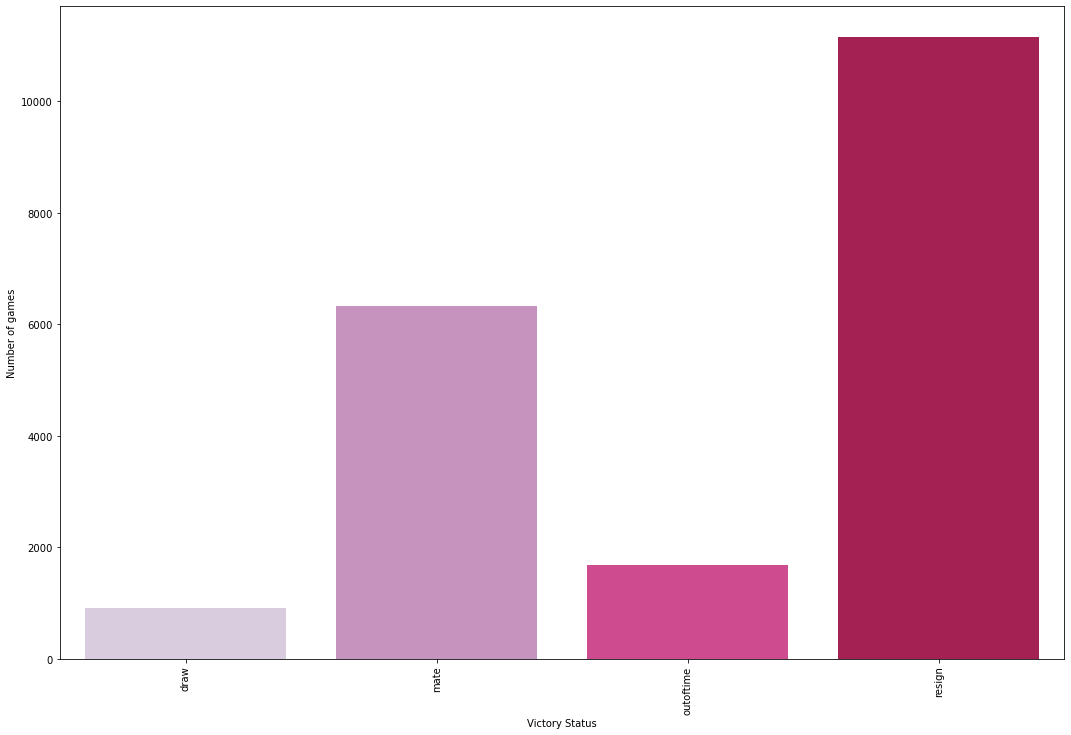

In [200]:
# To understand it easily we need to visualize these two questions. 

plt.figure(figsize=(18,12))
graph = sns.barplot(x = 'victory_status',y = 'id',data = data1.reset_index(),palette = 'PuRd')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Victory Status')
plt.ylabel('Number of games')

Text(0, 0.5, 'Number of games')

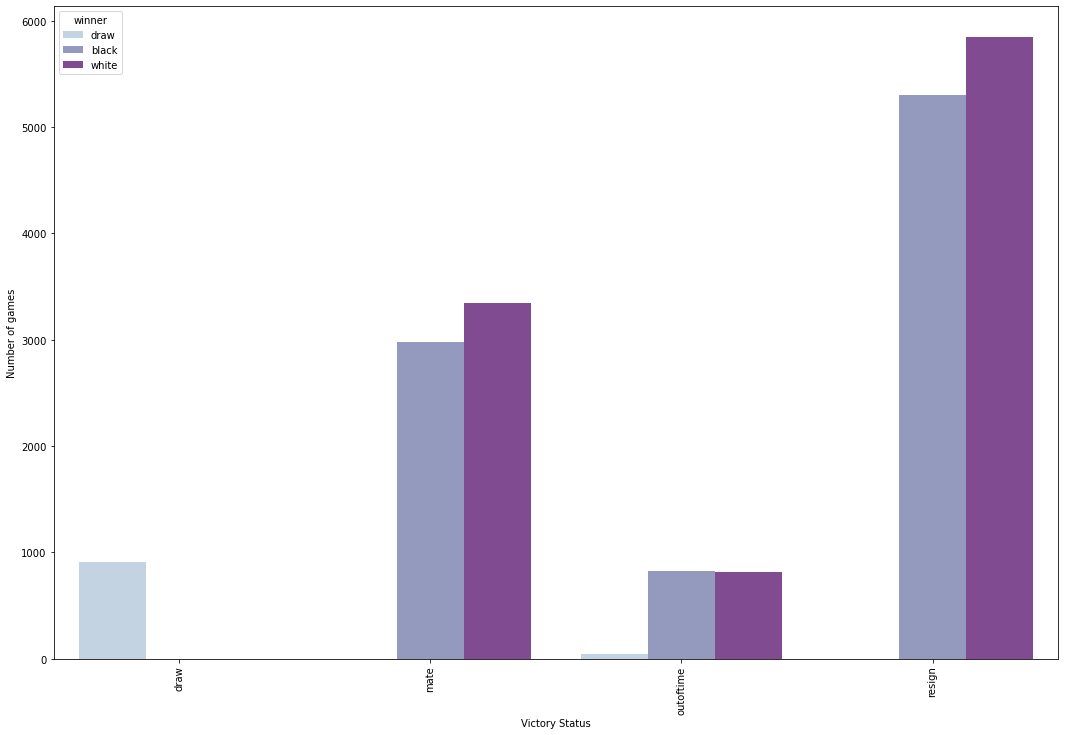

In [201]:
#So we found out that that the most number have mate and resign.Now we can found out the proportion of black and white in 
#each victory status.To understand are there any correlation between the victory status and starting the game first or second. 


plt.figure(figsize=(18,12))
graph = sns.barplot(x = 'victory_status',y = 'id',hue = 'winner',data = data2.reset_index(),palette = 'BuPu')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Victory Status')
plt.ylabel('Number of games')

#### Question 3: Is there any  effect of the ratings on the mate and resign? 

Text(0.5, 0, 'Victory Status')

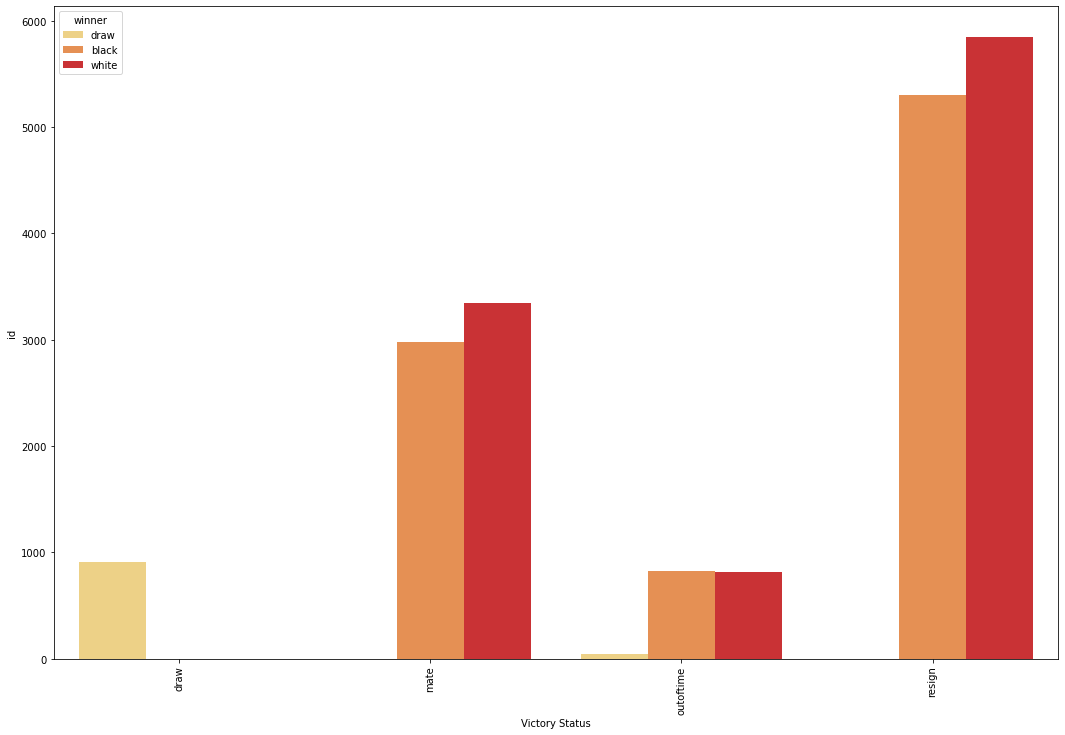

In [202]:
#As we can see in the above graph in mate we have more games with white but also we have the same result in the resign. 
#After this we can take a look on other variables. For example it is also important to consider the player's rating.

data_mate = data[data['victory_status']=='mate']
data_mate[['victory_status','winner','white_rating','black_rating']]
plt.figure(figsize=(18,12))
graph = sns.barplot(x = 'victory_status',y = 'id',hue = 'winner',data = data2.reset_index(),palette = 'YlOrRd')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Victory Status')

In above three graphs I have used sequntial palette.

#### Question 4: Do the number of turns affect the game result for white and black players? 

In [209]:
#Separate data in two datasets.One where winners only whites and the second where winners only blacks. 

data_moves_white = data[data['winner']=='white']
data_moves_black = data[data['winner']=='black']

In [210]:
#Now we want to find number of turns for each victory status for white winners and sort them for mate.

data_moves_white = data_moves_white.groupby(['victory_status','turns']).count()[['id']]
data_moves_white = data_moves_white.unstack()
data_moves_white1 = data_moves_white.sort_values(by = 'mate',axis = 1,ascending = False)
data_moves_white1

id                                                          \
turns             57     39     47     49     41     53     51     59     61    
victory_status                                                                  
mate            110.0  109.0  107.0  105.0  104.0  100.0  100.0   97.0   89.0   
outoftime        12.0    6.0   10.0   13.0   18.0   29.0   16.0   16.0   34.0   
resign          140.0  141.0  130.0  118.0  136.0  146.0  148.0  111.0  114.0   

                       ...                                                    
turns             35   ...  134  136  138  140  154  177  185  205  209  349  
victory_status         ...                                                    
mate             87.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
outoftime         9.0  ...  NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0  1.0  2.0  
resign          126.0  ...  1.0  2.0  1.0  1.0  1.0  NaN  1.0  NaN  1.0  NaN  

[3 rows x 165 columns]

In [211]:
#Now we do the same thing but here the white player win the game because black player resign.
data_moves_white2 = data_moves_white.sort_values(by = 'resign',axis = 1,ascending = False)
data_moves_white2

id                                                          \
turns             45     43     51     53     39     57     41     55     33    
victory_status                                                                  
mate             77.0   87.0  100.0  100.0  109.0  110.0  104.0   83.0   60.0   
outoftime         9.0    6.0   16.0   29.0    6.0   12.0   18.0   13.0    7.0   
resign          176.0  161.0  148.0  146.0  141.0  140.0  136.0  135.0  131.0   

                       ...                                                    
turns             47   ...  165  167  173  175  177  179  183  193  205  349  
victory_status         ...                                                    
mate            107.0  ...  1.0  3.0  3.0  2.0  NaN  2.0  2.0  1.0  NaN  NaN  
outoftime        10.0  ...  1.0  NaN  1.0  1.0  1.0  NaN  NaN  NaN  1.0  2.0  
resign          130.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 165 columns]

As we can see white players win the game with mate in most cases with 57,39,47 turns.Also it is interesting that 
white player win the game with resign in most cases also on 45,43,51 turns.Repeat this steps the same for black players.

In [212]:
data_moves_black = data_moves_black.groupby(['victory_status','turns']).count()[['id']]
data_moves_black = data_moves_black.unstack()
data_moves_black1 = data_moves_black.sort_values(by = 'mate',axis = 1,ascending = False)
data_moves_black1

id                                                          \
turns             52     54     62     58     56     50     48     44     60    
victory_status                                                                  
mate            111.0  103.0   98.0   97.0   97.0   91.0   88.0   87.0   86.0   
outoftime        18.0   14.0   21.0   10.0   18.0   12.0   10.0    8.0   20.0   
resign          130.0  140.0  121.0  112.0  127.0  137.0  125.0  120.0  117.0   

                       ...                                                    
turns             64   ...  135  139  141  153  159  172  198  200  204  218  
victory_status         ...                                                    
mate             82.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
outoftime        18.0  ...  NaN  NaN  NaN  NaN  NaN  2.0  NaN  1.0  1.0  NaN  
resign          102.0  ...  2.0  1.0  1.0  1.0  1.0  1.0  2.0  NaN  NaN  1.0  

[3 rows x 173 columns]

In [213]:
#And to the same but this time we want to find most popular turns number where black players win the game and white resigns. 


data_moves_black2 = data_moves_black.sort_values(by = 'resign',axis = 1,ascending = False)
data_moves_black2

id                                                          \
turns             54     40     50     52     56     30     48     62     44    
victory_status                                                                  
mate            103.0   76.0   91.0  111.0   97.0   38.0   88.0   98.0   87.0   
outoftime        14.0   15.0   12.0   18.0   18.0   13.0   10.0   21.0    8.0   
resign          140.0  139.0  137.0  130.0  127.0  125.0  125.0  121.0  120.0   

                       ...                                                    
turns             46   ...  176  184  188  190  196  200  204  206  210  222  
victory_status         ...                                                    
mate             76.0  ...  1.0  1.0  2.0  1.0  3.0  NaN  NaN  1.0  2.0  1.0  
outoftime        20.0  ...  NaN  NaN  NaN  NaN  NaN  1.0  1.0  NaN  NaN  NaN  
resign          118.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 173 columns]

Now the black players in the most cases do mate in 52,54,62 turns.And win the game with resign in 54,40,50 turns. 
Compare with mate we can see that they vary in (40-60) turns the same we can say about resign. 

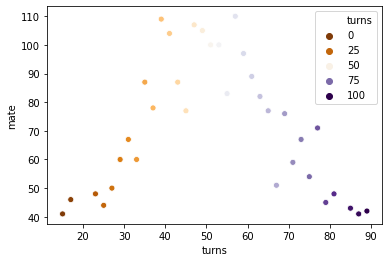

In [214]:
#white do a mate 
#As we can see here the steps concentrated in 40-60 steps. So white players win the game with mate aproximately near 40-60
#turns

sns.scatterplot(data= data_moves_white1.iloc[0,:35].reset_index(), x="turns", y="mate",hue = 'turns',palette = 'PuOr')

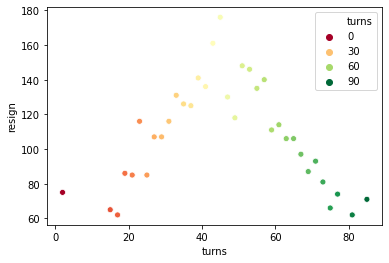

In [216]:
#white win the game with black's resign 
#Here we can see that whites win the game earlier, near 40.Aproximately 40-45 turns. 

sns.scatterplot(data= data_moves_white2.iloc[2,:35].reset_index(), x="turns", y="resign",hue = 'turns',palette = 'RdYlGn')

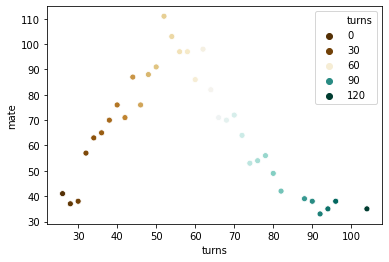

In [222]:
#black do a mate 
#Here we can see that blacks do a mate a little but later, maybe because they need more turns. But they need 50-60 turns.

sns.scatterplot(data= data_moves_black1.iloc[0,:35].reset_index(), x="turns", y="mate",hue = 'turns',palette = 'BrBG')

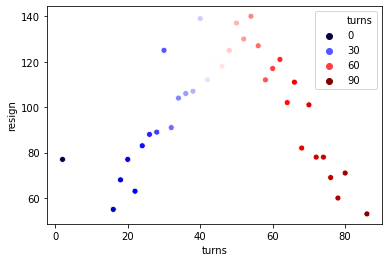

In [220]:
# black win the game with white's resign
#Here we can see that even for resign compare with white win with black's resign black players need mor steps 
#here the turns aroun 60.

sns.scatterplot(data= data_moves_black2.iloc[2,:35].reset_index(), x="turns", y="resign",hue = 'turns',palette = 'seismic')

So we conslude that number of turns affect the victory status. Or there is correlation between the victory status and 
the number of turns. 

In above graphs I have used the Diverging palette.

#### Question 5: Do white players have an adventage, because of the starting the game first?

In [156]:
#So we are interested in that white win the game because the player started the game or has the higher rating.
# So first of all we separate black from white and than separate the games that the white player has the higher rating
# and the white player has the lower rating. 
data_mate_white = data_mate[data_mate['winner']=='white']
data_mate_black = data_mate[data_mate['winner']=='black']


#So after this we write the logic. 
data_mate_white_high = data_mate_white[data_mate_white['white_rating']> data_mate_white['black_rating']]
data_mate_white_low = data_mate_white[data_mate_white['white_rating']<data_mate_white['black_rating']]

data_mate_black_high = data_mate_black[data_mate_black['black_rating']> data_mate_black['white_rating']]
data_mate_black_low = data_mate_black[data_mate_black['black_rating']< data_mate_black['white_rating']]

In [157]:
print(data_mate_white.shape[0])
print(data_mate_black.shape[0])

3344
2981


In [158]:
#So here we can see that white doing mate when has a higher rating the same we can say about black.But also we can see 
#that white and black do a mate even they have a lower rating.We need to find percentages of mate with white lower rating
#and mate with black lower rating. 


print(data_mate_white_high.shape[0])
print(data_mate_white_low.shape[0])

print(data_mate_black_high.shape[0])
print(data_mate_black_low.shape[0])

2216
1095
1977
975


In [159]:
perc_white_low= data_mate_white_low.shape[0]/data_mate_white.shape[0]
perc_black_low = data_mate_black_low.shape[0]/data_mate_black.shape[0]

print(perc_white_low)
print(perc_black_low)

#So as we can see they are almost the same.There is no difference you start with whites or blacks. It depends mostly on 
#rating and other factors that we are continuing to analyse. 

0.32745215311004783
0.32707145253270714


<function matplotlib.pyplot.show(*args, **kw)>

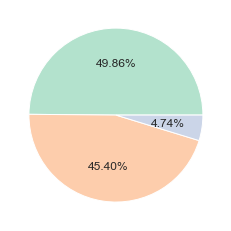

In [227]:
sns.set()
sns.set_palette('Pastel2')
plt.pie(data['winner'].value_counts(),autopct='%1.2f%%')
plt.show

Here we can see that even with pie chart there is no big affect of starting the game with whites on the game's result.

Here I have used the qualitative palette, as there is no order here.

#### Question 6: Do the players with higher rating than their oponent have different opening than the players who has the lower rating than their oponent? 

In [231]:
# Another factor that can effect the game is the oppening and the turn numbers.
#Here wi pick a data with white players who win the game,the white player has the lower rating than his oponent. 


data_openning = data_mate_white_low.groupby(data_mate_white_low['opening_name']).count()[['id']]
data_openning = data_openning.unstack()
data_openning = data_openning.sort_values(ascending = False)
data_openning.head()

    opening_name                                 
id  Scandinavian Defense: Mieses-Kotroc Variation    20
    Philidor Defense #2                              17
    Queen's Pawn Game: Chigorin Variation            17
    Sicilian Defense: Bowdler Attack                 17
    Four Knights Game: Italian Variation             16
dtype: int64

In [232]:
#So we can compare this results whit white players but with higher rating than their oponent are they still choose the same openngs? 

data_openning_whigh = data_mate_white_high.groupby(data_mate_white_high['opening_name']).count()[['id']]
data_openning_whigh = data_openning_whigh.unstack()
data_openning_whigh = data_openning_whigh.sort_values(ascending = False)
data_openning_whigh.head()

    opening_name                                 
id  Scandinavian Defense: Mieses-Kotroc Variation    46
    Scotch Game                                      37
    French Defense: Knight Variation                 35
    Philidor Defense #3                              33
    Owen Defense                                     30
dtype: int64

In [233]:
#As we can see the most popular oppenings are the same but others differ from each other. Now lets compare black low rating's
#opennings with white low rating opennings. 

data_openning_blow = data_mate_black_low.groupby(data_mate_black_low['opening_name']).count()[['id']]
data_openning_blow = data_openning_blow.unstack()
data_openning_blow = data_openning_blow.sort_values(ascending = False)
data_openning_blow.head()

    opening_name                    
id  Van't Kruijs Opening                22
    Sicilian Defense: Bowdler Attack    21
    Sicilian Defense                    18
    Philidor Defense #2                 15
    Scandinavian Defense                15
dtype: int64

In [234]:
data_openning_bhigh= data_mate_black_high.groupby(data_mate_black_high['opening_name']).count()[['id']]
data_openning_bhigh = data_openning_bhigh.unstack()
data_openning_bhigh = data_openning_bhigh.sort_values(ascending = False)
data_openning_bhigh.head()

    opening_name                          
id  Van't Kruijs Opening                      90
    Sicilian Defense                          51
    Sicilian Defense: Bowdler Attack          44
    Scandinavian Defense                      36
    King's Pawn Game: Wayward Queen Attack    32
dtype: int64

Here when we see that no matter black player has a higher rating or lower they have more chances to win when the game started with one of this 5 opennings, especially the Van't Kruijs Opening. Also we found out that the most good openning for white 
players are Scandinavian Defense: Mieses-Kotroc Variation no matter the player has a higher rating or lower.
But for white player's other opennings, we must consider other factors too.

Here we see some similarities especially with black players.But also we have difference between white players.But we can't prove that those differences depend on that small difference with their oponent. It would be better to compare some rating groups for white and black players and openings to undrstand are there any correlations between openings and ratings groups. 

To sum up we found out that for blacks the best opening is Van't Kruijs Opening and for white players Scandinavian Defense: Mieses-Kotroc Variation.

#### Question 7:Is there any correlation between rating groups and their game's openings?

In [235]:
data_mate_white['white_rating'].max()

2621

In [253]:
#We are creating here new feature which is called rating group for white winners.

rating_group = []
for row in data_mate_white['white_rating']:
    if row < 500:    rating_group.append('0-499')
    elif row >= 500 and row <1000:  rating_group.append('500-999')
    elif row >= 1000 and row < 1500:  rating_group.append('1000-1499')
    elif row >= 1500 and row < 2000:  rating_group.append('1500-1999')
    elif row >= 2000 and row < 2500:  rating_group.append('2000-2499')   
    else:           rating_group.append('2500+')


In [237]:
data_mate_white['rating_group'] = rating_group

In [238]:
data_openning_rating_white = data_mate_white.groupby(['rating_group','opening_name']).count()[['id']]
data_openning_rating_white= data_openning_rating_white.unstack()
data_openning_rating_white = data_openning_rating_white.sort_values(by = ['500-999'],axis =1 ,ascending = False)
data_openning_rating_white.head()

id                        \
opening_name Alekhine Defense: Mokele Mbembe Three Knights Opening   
rating_group                                                         
1000-1499                                1.0                   5.0   
1500-1999                                2.0                   9.0   
2000-2499                                NaN                   2.0   
2500+                                    NaN                   NaN   
500-999                                  2.0                   2.0   

                                                                           \
opening_name King's Knight Opening King's Pawn Game: Wayward Queen Attack   
rating_group                                                                
1000-1499                     14.0                                   19.0   
1500-1999                     12.0                                   12.0   
2000-2499                      NaN                                    NaN   
2500+                          NaN                                    NaN   
500-999                        2.0                                    1.0   

                                                                              \
opening_name Sicilian Defense Scandinavian Defense Ruy Lopez: Bird Variation   
rating_group                                                                   
1000-1499                16.0                 12.0                       4.0   
1500-1999                23.0                 10.0                       1.0   
2000-2499                 NaN                  NaN                       NaN   
2500+                     NaN                  NaN                       NaN   
500-999                   1.0                  1.0                       1.0   

                                                                        ...  \
opening_name Russian Game: Urusov Gambit Polish Opening Mieses Opening  ...   
rating_group                                                            ...   
1000-1499                            5.0            3.0            5.0  ...   
1500-1999                            6.0            4.0            2.0  ...   
2000-2499                            NaN            NaN            NaN  ...   
2500+                                NaN            NaN            NaN  ...   
500-999                              1.0            1.0            1.0  ...   

                                                 \
opening_name Zukertort Opening: Pirc Invitation   
rating_group                                      
1000-1499                                   NaN   
1500-1999                                   4.0   
2000-2499                                   NaN   
2500+                                       NaN   
500-999                                     NaN   

                                                           \
opening_name Zukertort Opening: Queen's Gambit Invitation   
rating_group                                                
1000-1499                                             9.0   
1500-1999                                            10.0   
2000-2499                                             5.0   
2500+                                                 NaN   
500-999                                               NaN   

                                                                \
opening_name Zukertort Opening: Queenside Fianchetto Variation   
rating_group                                                     
1000-1499                                                  NaN   
1500-1999                                                  2.0   
2000-2499                                                  NaN   
2500+                                                      NaN   
500-999                                                    NaN   

                                              \
opening_name Zukertort Opening: Quiet System   
rating_group                                   
1000-1499          

Changing sorting values argument (by) we found out that for higher ratings like 2000-2499 and 2500+ most popular openings 
are :<br>
Zukertort Opening: Queen's Gambit Invitation, Ruy Lopez, Italian Game: Giuoco Pianissimo | Italian Four Knights Variation.<br> 

For middle ratings like 1000-1499 and 1500-1999 we have these popular openings.<br> 
Four Knights Game: Italian Variation,Scandinavian Defense: Mieses-Kotroc Variation,Philidor Defense #2,French Defense: Knight Variation,Scotch Game  that helps white players to win the game.<br>

For lower ratings we have these popular openings that give a chance white players to win a game.<br>
Alekhine Defense: Mokele Mbembe,Three Knights Opening

In [254]:
# We are doing the same steps for black players.

rating_group_2 = []
for row in data_mate_black['black_rating']:
    if row < 500:    rating_group_2.append('0-499')
    elif row >= 500 and row <1000:  rating_group_2.append('500-999')
    elif row >= 1000 and row < 1500:  rating_group_2.append('1000-1499')
    elif row >= 1500 and row < 2000:  rating_group_2.append('1500-1999')
    elif row >= 2000 and row < 2500:  rating_group_2.append('2000-2499')   
    else:           rating_group_2.append('2500+')


In [240]:
data_mate_black['rating_group_2']=rating_group_2

In [241]:
data_openning_rating_black = data_mate_black.groupby(['rating_group_2','opening_name']).count()[['id']]
data_openning_rating_black= data_openning_rating_black.unstack()
data_openning_rating_black = data_openning_rating_black.sort_values(by = ['2500+'],axis =1 ,ascending = False)
data_openning_rating_black.head()

id  \
opening_name   Budapest Defense: Adler Variation   
rating_group_2                                     
1000-1499                                    NaN   
1500-1999                                    6.0   
2000-2499                                    NaN   
2500+                                        1.0   
500-999                                      NaN   

                                                                            \
opening_name   Sicilian Defense: Modern Variations |  Anti-Qxd4 Move Order   
rating_group_2                                                               
1000-1499                                                     NaN            
1500-1999                                                     NaN            
2000-2499                                                     1.0            
2500+                                                         1.0            
500-999                                                       NaN            

                                                               \
opening_name   Torre Attack Van Geet Opening Alekhine Defense   
rating_group_2                                                  
1000-1499               NaN             10.0              3.0   
1500-1999               2.0              3.0              1.0   
2000-2499               NaN              NaN              NaN   
2500+                   1.0              1.0              NaN   
500-999                 NaN              NaN              NaN   

                                                                       \
opening_name   Alekhine Defense #2 Alekhine Defense: Balogh Variation   
rating_group_2                                                          
1000-1499                      1.0                                NaN   
1500-1999                      NaN                                NaN   
2000-2499                      NaN                                1.0   
2500+                          NaN                                NaN   
500-999                        NaN                                NaN   

                                                     \
opening_name   Alekhine Defense: Exchange Variation   
rating_group_2                                        
1000-1499                                       1.0   
1500-1999                                       NaN   
2000-2499                                       NaN   
2500+                                           NaN   
500-999                                         NaN   

                                                    \
opening_name   Alekhine Defense: Four Pawns Attack   
rating_group_2                                       
1000-1499                                      NaN   
1500-1999                                      1.0   
2000-2499                                      NaN   
2500+                                          NaN   
500-999                                        NaN   

                                                    ...  \
opening_name   Alekhine Defense: John Tracy Gambit  ...   
rating_group_2                                      ...   
1000-1499                                      NaN  ...   
1500-1999                                      NaN  ...   
2000-2499                                      1.0  ...   
2500+                                          NaN  ...   
500-999                                        NaN  ...   

                                                             \
opening_name   Zukertort Opening: Queen's Gambit Invitation   
rating_group_2                                                
1000-1499                                               2.0   
1500-1999                                               2.0   
2000-2499                                               NaN   
2500+                                                   NaN   
500-999                                                 NaN   

                                              

Now we consider same rating groups for black winners.<br>

So for lower ratings these openings help black players to win the game:<br>
Hungarian Opening: Symmetrical Variation,Kadas Opening.<br>

For middle ratings 1000-1499:<br>
Van't Kruijs Opening,Scandinavian Defense,King's Pawn Game: Wayward Queen Attack.<br>
For 1500-1999 most popular openings that may effect the win of black players are:<br>
Van't Kruijs Opening,Sicilian Defense: Bowdler Attack,Sicilian Defense.<br>

For higher ratings like 2000-2499:<br>
Indian Game,Sicilian Defense.<br>
For 2500+: <br>
Budapest Defense: Adler Variation,Sicilian Defense: Modern Variations | Anti-Qxd4 Move Order,Torre Attack

So we found out that there is a correlation between winner color and opening.So the opening for specific player can help to win the game. So the opening affect the game. <br>
Also we found out that there is a correlation between rating groups and their openings. Because some openings are popular among 
specific groups. 

#### Question 8: Is there any correlation between game opening  turns and ratings? 

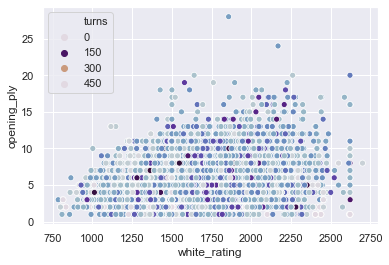

In [252]:
#So we are interesting in is there any correlation between turns and ratings. So we pick the winners white and try to
#visualize scatter plot with turns and their rating to understand the relationship.

sns.scatterplot(data= data[data['winner']=='white'], x="white_rating", y="opening_ply",hue = 'turns',palette = 'twilight')

As we can see the players with higher ratingg tend to play the games with openings that have more turns than the players
that have lower rating.Maybe the turns number depend on the opening's dificulty and that's why the players with higher 
ratings choose these openings.